<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter07/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4336 sha256=61ab0b66466fb21b6924de3810cb5ff89f7ccef477899ded62f27c63343e2413
  Stored in directory: c:\users\frakt\appdata\local\pip\cache\wheels\dd\5d\c1\1f9a5d313a93983d5d76cd3f1a4adb286a17176e65c6f704cb
Successfully built selectivesearch


In [3]:
img = read('Hemanvi.jpeg', 1)

In [4]:
segments_fz = felzenszwalb(img, scale=200)

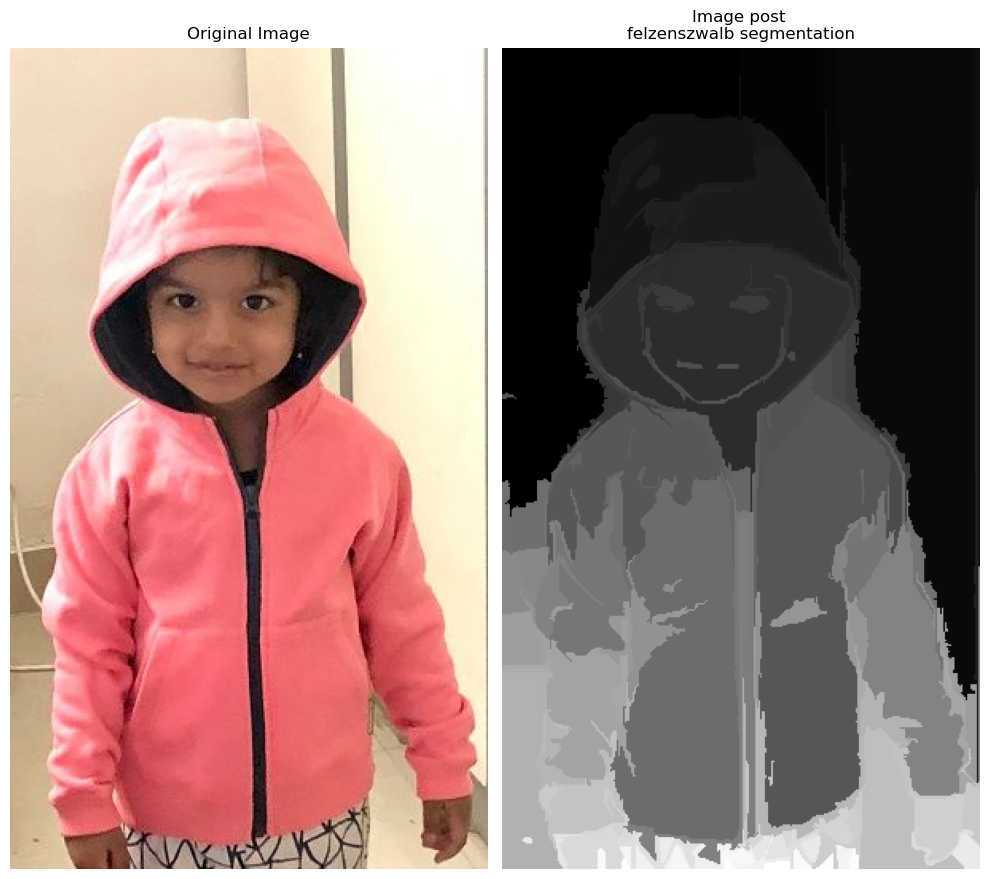

In [5]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

In [6]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


In [7]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
img = read('Hemanvi.jpeg', 1)

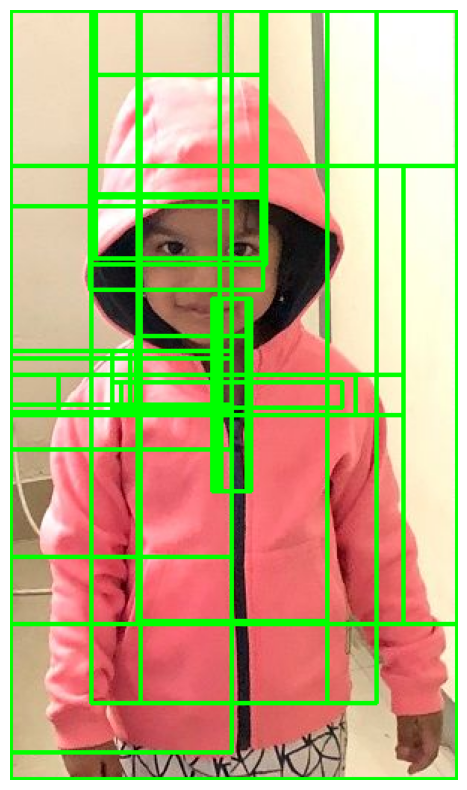

In [8]:
candidates = extract_candidates(img)
show(img, bbs = candidates)